# Lecture 11: Amplitude Modulation and Demodulation

EE-40453, Digital Radio Communications, Spring 2020

J. Nicholas Laneman, Bertrand Hochwald, & Jonathan Chisum<br>
Wireless Institute & Department of Electrical Engineering<br>
University of Notre Dame

Copyright 2020, All Rights Reserved

## Summary

In this lecture, we will develop carrier modulation and demodulation theory to be able to translate baseband (low-frequency) waveforms into passband (high-frequency) waveforms and back.

## Motivation in Course Context

In the context of radio communication system block diagram below, we now have the understanding of how to generate and process low-frequency signals with our DAC and ADC, respectively. We have also learned that if we apply a current to a transmit antenna, we generate electromagnetic waves that propagate to the receive antenna, and are converted back into a current.

<img src="images/01.png" width="80%">

The key take away from the antennas module is that, depending upon the geometry, they are "resonant" to particular frequencies. Unless the antennas are impractically large, they tend to prefer high-freqeuency, or passband signals.

Thus, to continue building our radios we need to develop techniques and associated RF circuits to translate from baseband signals to passband signals and back.

## Outline

* Baseband and Passband Signals

* Carrier Modulation

* Carrier Demodulation

## Signal Classes

To begin, let us be clear about the two classes of signals upon which we focus.

### Baseband Signals

A *baseband signal* is either strictly bandlimited about $f=0$, or has most of its signal energy concentrated about $f=0$.

Specifically, let $x(t)$ be a finite-energy signal with Fourier transform $X(f)$, and for a given frequency $B>0$, let

$$\beta(B) = \frac{\int_{|f|\le B} |X(f)|^2 df}{E_x}$$

Here $\beta(B)$ is the fraction of the signal energy that lies in the frequency range $f\in[-B,+B]$. Often, we want to identify the frequency $B$ that has $90\%$, $95\%$, $99\%$, (and so on) of the signal energy, which we would call the *$90\%-$, $95\%-$, $99\%-$ (and so on) bandwidth*, respectively. If $x(t)$ has a $100\%$ bandwidth $B$, then it is strictly bandlimited to max frequency $B$.

#### Example

In [1]:
import numpy as np
from scipy import special
import matplotlib.pylab as plt 

In [2]:
# x = rect((t-T/2)/T)
# |X| = Tsinc(fT)
# B = 1/T
T = 1/200.
fs = 1e3/T
Ts = 1/fs
n = np.arange(5*fs*T,dtype=int) - 2*fs*T
t = n/fs
x = np.zeros( (int(5*fs*T),) ) 
x[2*int(fs*T):2*int(fs*T)+int(T/Ts)] = 1.0

f0 = 1/T
f = np.arange(10*f0,dtype = int) - 5*f0
X = T * abs(np.sinc(f*T))


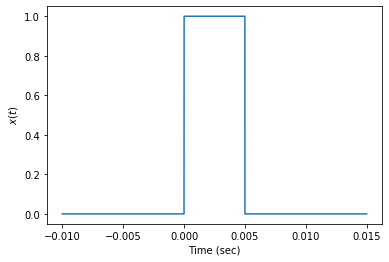

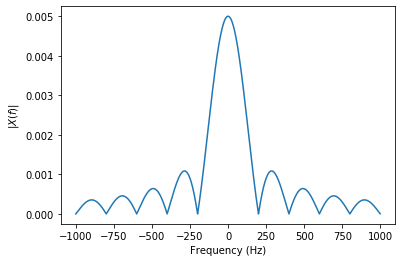

In [3]:

plt.plot(t,x,'-')
plt.ylabel("$x(t)$")
plt.xlabel("Time (sec)")
plt.show()

plt.plot(f,X,'-')
plt.ylabel("$|X(f)|$")
plt.xlabel("Frequency (Hz)")
plt.show()

In [4]:
B = 3/T
y = special.sici(2*B*T)[0]
# T^2 \int_0^B sinc^2(fT) df =  T/\pi  \int_0^{BT} sinc^2(x) dx
# =  T/pi   (Si(2BT) - sin^2(BT)/(BT))
Ex = T
beta = 2*T*(y - np.sin(B*T)*np.sin(B*T)/(B*T))/Ex/np.pi

print("For B = %d, beta(B) = %d" %(B, beta*100),"%")

For B = 600, beta(B) = 90 %


### Passband Signals

By contrast, a *passband signal* is one that has most of its energy centered about another frequency $f_c \gg 0$, which is often called the *center frequency* of the signal.

Specifically, let

$$\beta(f_c,B) = \frac{\int_{|f-f_c|\le B} |X(f)|^2 df}{E_x}$$

and

$$\beta_p(B) = \max_{f_c} \beta(f_c,B)$$

The notions of $9x\%$-passband bandwidth about a center frequency $f_c$ are analogous to those of $9x\%-baseband bandwidth about DC.

### Bandwidth

By convention, *bandwidth* of a real-valued signal is a measure of the range of positive frequencies of a signal that contain most of its energy. So a baseband signal that has most of its energy in the interval $f\in[-B,+B]$ is said to have *(baseband) bandwidth $B$*, while a passband signal that has most of its energy in the intervals $f\in[-f_c-B,-f_c+B]$ and $f\in[f_c-B,f_c+B]$ is said to have *passband bandwidth $2B$*.

## Amplitude Modulation

We begin with a real-valued, baseband signal $m(t)$, $t \in \mathbb{R}$. Let $B > 0$ denote the baseband bandwidth of this signal, so that its Fourier transform $M(f)$, $f \in \mathbb{R}$, satisfies $|M(f)|=0$ for $|f|>B$.

Suppose that we wish to represent $m(t)$ as a passband signal that is centered at frequency $f_c > 0$.

### Idea #1

Looking at the problem strictly in the frequency domain, a fairly intuitive idea to pursue is to translate the signal as follows

$$S_1(f) = M(f-f_c)$$

The corresponding relationship in the time domain is

$$s_1(t) = m(t)e^{j2\pi f_c t}$$

that is, multiplication by a complex exponential with frequency $f_c$. Although simple mathematically, the result is a complex-valued signal that we cannot implement in real circuits.

### Example

In [5]:
import numpy as np
from scipy import signal
import matplotlib.pylab as plt 
from scipy import fftpack



In [6]:
B = 1e2 # Hz
T = 1/B
fs = 1e3 # Hz
Ts = 1/fs
# Time domain
# Number of samplepoints
N = int(5e2)
t = np.linspace(0, N*Ts, num = N)
m = np.cos(2*np.pi*B*t)
mf = fftpack.fftshift(fftpack.fft(m))
freq1 = np.linspace(-fs/2, fs/2, num = N) #np.linspace(-1.0/(2.0*Ts), 1.0/(2.0*Ts), int(N))


fc = 1e3 # Hz
fs = 1e4 # Hz
Ts = 1/fs
N = int(1e3)
t2 = np.linspace(0, N*Ts, num = N)
m2 = np.cos(2*np.pi*B*t2)
s1 = m2 * np.exp(1j*2*np.pi*fc*t2)
s1_real = np.real(s1)
s1_img = np.imag(s1)

s1f = fftpack.fftshift(fftpack.fft(s1))
freq2 = np.linspace(-fs/2, fs/2, num = N)


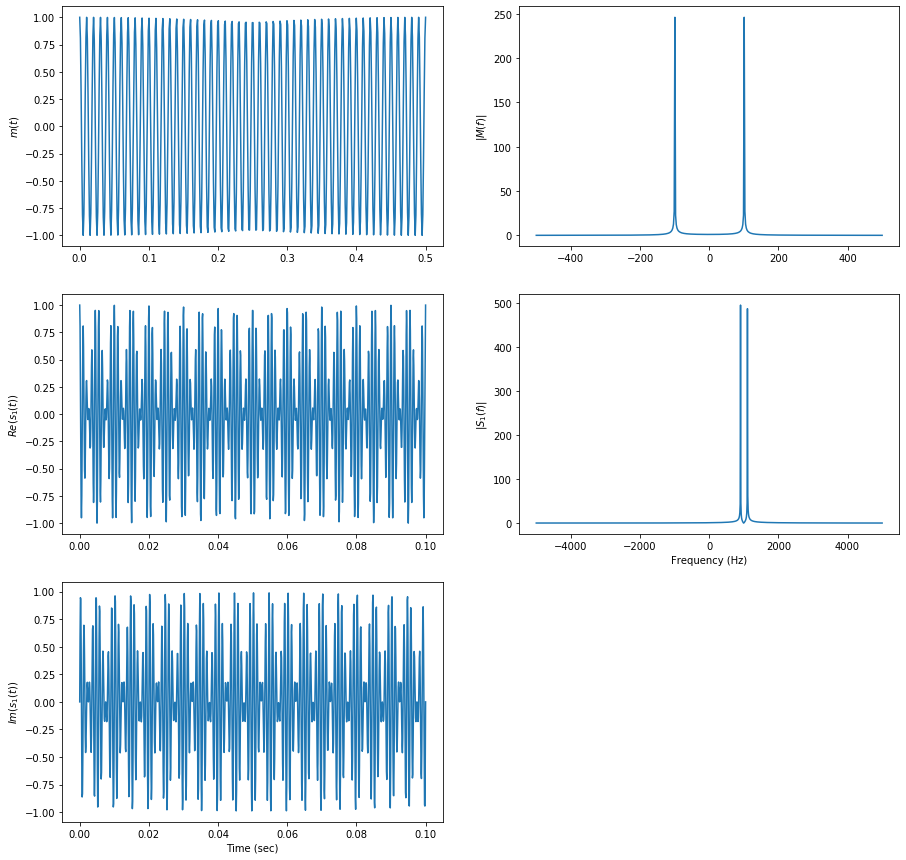

In [9]:

f = plt.figure(figsize=(15,15))
plt.subplot(321 )
plt.plot(t,m,'-')
plt.ylabel("$m(t)$")
plt.subplot(323)
plt.plot(t2,s1_real,'-')
plt.ylabel("$Re(s_1(t))$")
plt.subplot(325)
plt.plot(t2,s1_img,'-')
plt.ylabel("$Im(s_1(t))$")
plt.xlabel("Time (sec)")


plt.subplot(322)
plt.plot(freq1,abs(mf),'-')
plt.ylabel("$|M(f)|$")
plt.subplot(324)
plt.plot(freq2,abs(s1f),'-')
plt.ylabel("$|S_1(f)|$")

plt.xlabel("Frequency (Hz)")

plt.show()

### Idea #2

Now suppose that we simply force the signal to be real by taking the real part of $s_1(t)$, i.e.,

$$\begin{align}
s_2(t) &= \mathrm{Re}[s_1(t)] \\
&= \mathrm{Re}\left[m(t) e^{j2\pi f_c t} \right] \\
&= m(t)\cos(2\pi f_c t) \\
&= m(t) c(t)
\end{align}$$

where the last step is valid because we assumed that $m(t)$ is real-valued.

The diagram below is often used as a block diagram representation of the modulation.

<img src="images/02.png" width="80%">

This multiplication is often called a *modulation*, and the signal $c(t)$ is often called the *carrier signal*.

In the frequency domain, the relationship is

$$S_2(f) = \frac{1}{2}[M(f-f_c) + M(f+f_c)]$$

which can be obtained either my considering the convolution of $M(f)$ with the (generalized) Fourier transform of the cosine $\frac{1}{2}[\delta(f-f_c)+\delta(f+f_c)]$ or by considering the Fourier transform of $s_2(t) = \frac{1}{2}[s_1(t) + s^*_1(t)]$.

In words, the modulation creates two *copies* or *images* of the spectrum of $m(t)$, namely $M(f-f_c)$ centered at $+f_c$ and and $M(f+f_c)$ centered at $-f_c$.

We note that the highest frequency of the modulated signal $s(t)$ is $f_c + B$.

To ensure that the images do not overlap in the frequency domain, we require $f_c > 2B$, but very often $f_c \gg 2B$.

Some common terminology associated with this modulation scheme includes:

* $m(t)$ is called the *message signal* or *modulating signal*

* $c(t)$ is called the *carrier signal*

* $f_c$ is called the *carrier frequency* or *center frequency*

* $m(t)$ modulates the amplitude of the carrier signal, so the method is called *amplitude modulation*. More specifically, it is called *double sideband suppressed carrier (DSB-SC)* modulation

**Example**

Suppose you are asked to transmit a $10\,\rm{Hz}$ signal using amplitude modulation. However, your configuration also picks up some $100 \,\rm{Hz} noise prior to modulation. That is, the input to the modulator is:
$$m(t) = 2\cos(2\pi\cdot 10 t) + \frac{1}{2}\cos(2\pi\cdot 100 t).$$
If the carrier wave $c(t) = \cos(2\pi \cdot 1000 t)$, write down the resulting signal and calculate the signal-to-noise (S/N) ratio of it. 

<!--
    Source: https://engineering.purdue.edu/ME365/Homework/F14_HW11_sol.pdf
-->

Solution: 
\begin{align}
s(t) & = m(t) c(t) \\
& = \left(2\cos(2\pi\cdot 10 t) + \frac{1}{2}\cos(2\pi\cdot 100 t)\right)  \cos(2\pi \cdot 1000 t)\\
& = \cos\left(2\pi\cdot(10+1000) t\right) + \cos\left(2\pi\cdot(1000 - 10)t\right) + \frac{1}{4}\cos\left(2\pi\cdot(100+1000) t\right) +\frac{1}{4} \cos\left(2\pi\cot(1000 - 100)t\right)\\
& = \cos(2\pi\cdot 1010 t) + \cos(2\pi\cdot 990 t) + \frac{1}{4}\cos(2\pi\cdot 1100 t) +\frac{1}{4} \cos(2\pi\cdot 900 t)
\end{align}

signal-to-noise ratio:
\begin{align}
\frac{S}{N} & = \frac{\frac{1}{2} 1^2 + \frac{1}{2}1^2}{ \frac{1}{2}\left(\frac{1}{4}\right)^2 + \frac{1}{2}\left(\frac{1}{4}\right)^2 }\\
& = 16\\
& = 12\,\rm{dB}
\end{align}

## Amplitude Demodulation

Now suppose we have the opposed problem, named, we want to convert from a passband signal $s_2(t)$ back to a baseband signal $m(t)$.

### Idea #1

Looking at the problem strictly in the frequency domain, a fairly intuitive idea to pursue is to translate the signal as follows

$$\hat{M}_1(f) = S_2(f+f_c)$$

The corresponding relationship in the time domain is

$$\hat{m}_1(t) = s_2(t)e^{-j2\pi f_c t}$$

In this case, the signal is complex-valued, and there is extra frequency content centered at $f=-2 f_c$, so that $\hat{m}_1(t) \neq m(t)$.

## Idea #2

To remove the extra frequency content centered at $f=-2f_c$, we can simply lowpass filter the result of the previous idea.

<img src="images/03.png" width="80%">

## Idea #3

Finally, we consider $\hat{m}_3(t) = \mathrm{Re}\left[\hat{m}_2(t)\right]$, which yields

<img src="images/04.png" width="80%">

Another way to view the overall system is illustrated in the figure below.

<img src="images/05.png" width="80%">

The combination of modulation and the first stage of demodulation is equivalent to modulation of $m(t)$ by

$$\cos^2(2\pi f_c t)=\frac{1}{2} \left[1 + \cos(2\pi(2f_c) t) \right]$$

via trigonemtric identities.

This leads to three images of $M(f)$ centered at $f=0$ and $f=\pm f_c$, the latter two of which are filtered out by the low-pass filter.

## Discrete-Time Implementation

To emulate the modulation in discrete time, either for digital circuit implementations or software implementations on a computer, we consider a sampled version of $s(t)$ with sampling period $T_s >0$.

To satisfy the sampling theorem for $s(t)$, we require that the sampling frequency $f_s = 1/T_s$ satisfy $f_s > 2 (f_c + B)$, which implies that we also satisfy the sampling theorem for $m(t)$ and $c(t)$.

If we define the discrete-time sample sequences as $s[n]=s(nT_s)$, $m[n]=m(nT_s)$, and $c[n]=c(nT_s)$, respectively, for $n \in \mathbb{Z}$, the modulation becomes

$$s[n] = m[n] \cdot c[n] = m[n] \cos(2\pi (f_c T_s) n) = m[n] \cos(2\pi (f_c / f_s) n)$$

where $u_c = f_c / f_s$ is the normalized frequency of the DT carrier signal.

Let's continue with some simple example code to generate a discrete-time, carrier-modulated waveform.

In [47]:
import numpy as np
import matplotlib.pylab as plt 

In [48]:
B = 20000.
fc = 800000.
fs = 5*2.*(fc+B)
Ts = 1/fs
n = np.arange(2*fs/B,dtype=int)
m = np.cos(2*np.pi*(B/fs)*n)
c = np.cos(2*np.pi*(fc/fs)*n)
s = m*c

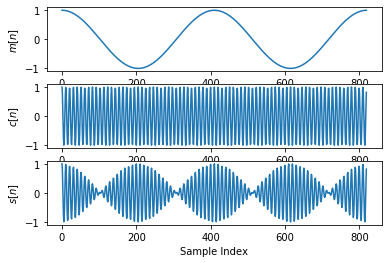

In [49]:
plt.subplot(311)
plt.plot(n,m,'-')
plt.ylabel("$m[n]$")
plt.subplot(312)
plt.plot(n,c,'-')
plt.ylabel("$c[n]$")
plt.subplot(313)
plt.plot(n,s,'-')
plt.ylabel("$s[n]$")
plt.xlabel("Sample Index")
plt.show()

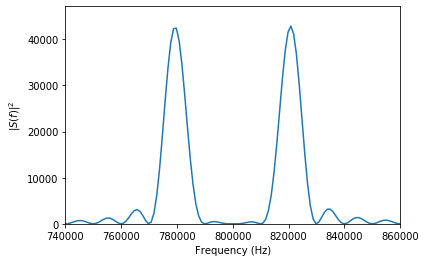

In [50]:
K=8192
S = np.square(np.abs(np.fft.fft(s,K)))
plt.plot(np.arange(0,fs,fs/K),S,'-')
plt.ylabel("$|S(f)|^2$")
plt.xlabel("Frequency (Hz)")
plt.axis([fc-3*B,fc+3*B,0.,1.1*np.max(S)])
plt.show()

We note that this implementation model only considers the highest frequency signal of the modulator. To implement the demodulator as well, we would require $f_s > 2(2f_c+B)$.